# Approach 
     Initial primary research on corpus and support for foreign language (japanese) in python environment is minimal. Also the structure of japanese is much complex than english when understanding the meaning from words. Most of the tokenaier available to seperate words in japanese works by backing on data base of vocab and rule sets. 


    This force me to search for solution which can be scalled both horizontally in complexity and vertically in data size. Thus I choose to convert japanese to english by using GOOGLE TRANSLATION API and then utilizing the plethora of toolset available to process junk data and produce useful ingights. Also convertion into engligh will open opportunities to work on different key area like "TOPIC MODELLING", "TEXT SUMMARIZATION" etc
    
    May be in later phase we would create Language model based on RNN build on Tensor-flow to directly use local model for language inter-converison.
    
    In final phase we will be sharing key statistics again in Native language (Japaneese)
    
    
##### Reason to use Python over R:
    Text handling capabilities in Python are much advance and have low learning curve thus python is chosen as first language to process data. 
    
So in this excercise we will be using Following libraries:
* Numpy
* Python Pandas 
* Python RegEx 
* ScikitLearn
* WordCloud
* NLTK
* TextBlob

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

#### Data Loading

In [5]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
from textblob import TextBlob

In [6]:
data = pd.read_excel('Unstructured Data Japanese.xls', sheetname='Sheet2',index_col='Sno')
data.columns = ['text']  # remane column name
data.head()   # checking top few rows

,text
Sno,
1,「私は、私は再び8だように行動し、Velveetaマックとディナーにチーズを食べたいです。し...
2,this_Ray私は病気で寝ていると私は眠ることができません。 「赤穂PO SIトラヴィスク...
3,RT JeffSchultzAJC：グッデルは、彼はまた、クラを掃除された理由のAFCタイト...
4,「グッデルは、彼はまた、クラフトのガレージ、プールを掃除された理由のAFCタイトルゲームはま...
5,RTのc8suchy：「WorldStarComedy：このSMOKE TORNADO CR...


### Japense to English Conversion 

##### Goslate 

In [ ]:
import goslate
gs = goslate.Goslate()

In [ ]:
#text_list = data.values.tolist()
text_list[6]

In [ ]:
def Japanese_English(text):
    return gs.translate(text, 'en')    

In [ ]:
data.text.apply(Japanese_English)

In [ ]:
text = '「私は、私は再び8だように行動し、Velveetaマックとディナーにチーズを食べたいです。しかし、それは本当に私は明日行う必要があるでしょう心肺価値はありません' 
print(gs.translate(text, 'en'))

    This library got forbiden reply from google https service. Google forbids parsing Google Translate page and thus Developer has stoped updating this library to encounter new Ticket system adopeted in Google Translate page. 

### TextBlob
    This Library directly access google API thus produce results legitimatly.

In [217]:
from textblob import TextBlob

In [218]:
# Sample test 

text = '「私は、私は再び8だように行動し、Velveetaマックとディナーにチーズを食べたいです。しかし、それは本当に私は明日行う必要があるでしょう心肺価値はありません' 

blob = TextBlob(text)
blob.translate(to="en")  

TextBlob(""I want to act like 8 again and I want to eat cheese for Velveeta Mac and dinner, but it really does need me to do tomorrow is not cardiovascular worth")

It was found that TextBlob returns error when the input text (input language) and output txt (changed language) are same.
So this keep chalange to process whole data in one shot via for loop.

In this phase I am tracing the index of error and then updating translated List ignoring that index by manually changing to new index. But in future this code section can be beter optimized to handle this error by defining function and curating this via error handling codes.

In [ ]:
# Empty list to hold elements of translated tweets
translated = []

In [ ]:
# for loop to iteratively translate each tweet into English
# Chnge to next index if error occurs - to be automated later

for i in data.text[280]:
    text = i
    blob = TextBlob(text)
    result = blob.translate(to="en").raw
#   translated.append(result)
    print(i, result)

In [ ]:
# converted to Pandas Series for easy text processing
translated_data = pd.Series(translated) 

In [ ]:
# Saving to pickle for future use
# Pickle will maintain the encoding and dataType thus 
# made working on same data easier
translated_data.to_pickle(path='Jap_eng_Pickle')

In [160]:
# Saving to csv for inspecction
data_new.to_csv('Jap_eng.csv', sep = "|")

## Task 1
#### Text Preocessing 

In [7]:
data  = pd.read_pickle('Jap_eng_Pickle') # Loading Pikle
print(type(data))                        # checking DataType
data = pd.DataFrame(data)                # Changing to Pandas DataFrame
print(type(data))                         # checking DataType
data.columns = ['text']                   # Renaming Tweet Column
data.head(1).values                      # cheking top tweets

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


array([[ '"I want to act like 8 again and I want to eat cheese for Velveeta Mac and dinner, but it really does need me to do tomorrow is not cardiovascular worth']], dtype=object)

In [8]:
# Step- 1 Lower case words
data['text'] = data['text'].apply(lambda x : x.lower())

In [9]:
# Step- 2  Remove words with single characters 
# this step is used intially because language conversion resulted into various single ccharacters
data['text'] = data['text'].apply(lambda x: re.sub(r'\W*\b\w{1}\b',r'',x))

In [10]:
# Step - 3 Remove special characters 
data['text'] = data['text'].apply(lambda x: re.sub(r"[|‘|’|'|!|:|>|<|$|_|#|£|+|&|]",r'',x))

In [11]:
# Step - 4 Remove special characters 
data['text'] = data['text'].apply(lambda x: re.sub(r'[|^|=|~|…|”|“|"|"|%|/|@|(|)|]',r'',x))

In [12]:
# Step - 5 Remove special characters
data['text'] = data['text'].apply(lambda x: re.sub(r'[|.|-|;|*|×|]',r'',x))

In [13]:
# Step- 6  remove digits 
data['text'] = data['text'].apply(lambda x: re.sub(r"\d+",r'',x))

In [14]:
# Step - 7 Remove words with less than 3 characters
# after post processing various junk characters evolve
data['text'] = data['text'].apply(lambda x: re.sub(r'\W*\b\w{1,2}\b',r'',x))

In [15]:
# Step - 8 Remove words greater than 15 leters
# upon initial examination it was found that there are various gibrish words fromed by wrong translation
data['text'] = data['text'].apply(lambda x: re.sub(r'\W*\b\w{15,}\b',r'',x))

In [16]:
# step- 9 remove extra spaces
data['text'] = data['text'].apply(lambda x: re.sub("\s\s+", " ", x))

In [17]:
# # step- 10 remove stopwords
eng_stopwords.extend(['http','https','htt','get','something','want'])  # extend stopwords list 
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (eng_stopwords)]))

In [18]:
# Save Clean file in local directory
# used iteratively to examine cleanring process at each stage mentioned above
data.text.to_csv('japenese_task_clean_text.txt', index=False, sep='|')

## Task 2
#### TDM (Term Document Matrix) 

In [19]:
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
# I have restricted the no of features to be used in TDM  to be 5k
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None, preprocessor = None,stop_words = None, max_features = 5000)

In [243]:
train_data_features = vectorizer.fit_transform(data.text)
train_data_features = train_data_features.toarray()
print (train_data_features.shape)
train_data_features

(538, 2007)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [244]:
# Take a look at the words in the vocabulary
# We will use this to create user-friendly TDM
vocab = vectorizer.get_feature_names()
vocab[:10]

['aair',
 'abbyrossss',
 'able',
 'aboutslander',
 'absolutely',
 'access',
 'according',
 'account',
 'aceah',
 'acid']

In [245]:
# Convert Numpy Sparce matrix into DataFrame 
dtm = pd.DataFrame(train_data_features, columns = vocab).transpose()
dtm.head()

,0,1,2,3,4,5,6,7,8,9,...,528,529,530,531,532,533,534,535,536,537
aair,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbyrossss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aboutslander,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)
dist = list(dist)
dist[:5]

[1, 1, 1, 1, 1]

In [247]:
vocab_freq = pd.DataFrame(dist, index=vocab )
vocab_freq.columns = ['freq']

In [248]:
final_dtm = pd.concat([dtm, vocab_freq], axis=1)
final_dtm.sort_values(by = 'freq', ascending= False, inplace= True)

In [249]:
final_dtm[:10]

,0,1,2,3,4,5,6,7,8,9,...,529,530,531,532,533,534,535,536,537,freq
craft,0,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,156
cheese,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,83
rtk,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,66
robot,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,64
sorry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,53
gvhsp,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,46
velveeta,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
musc,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,30
muscle,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,28
air,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,26


#### Word Cloud

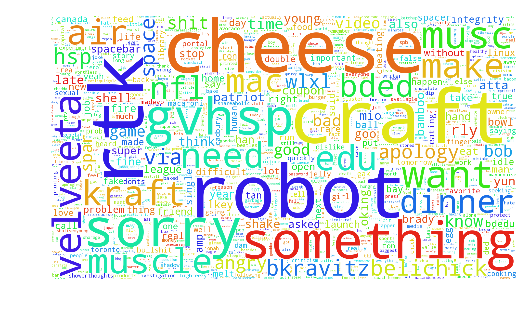

In [185]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# Read the whole text.
text = '-'.join(data.text.values.tolist())

wordcloud = WordCloud().generate(text)

import matplotlib.pyplot as plt


wordcloud = WordCloud(width=1900, height=1080, background_color="white", max_font_size=300, max_words=1000).generate(text)
wordcloud.to_file("japenese_cloud.png")

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Task 3
#### Sentiment Analysis

In [21]:
def sentiment(data):
    analysis = TextBlob(data)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [22]:
data['sentiment'] = data.text.apply(sentiment)
data.sentiment.value_counts()

neutral     283
negative    142
positive    113
Name: sentiment, dtype: int64

#### Negative Tweets word Cloud 

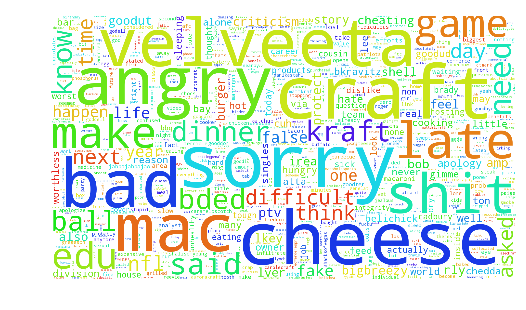

In [252]:
data_neg = data[data.sentiment=='negative']

text = '-'.join(data_neg.text.values.tolist())

wordcloud = WordCloud().generate(text)

import matplotlib.pyplot as plt


wordcloud = WordCloud(width=1900, height=1080, background_color="white", max_font_size=300, max_words=1000).generate(text)
wordcloud.to_file("neg_cloud.png")

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


##### Top Frequency words in Negative sentiments are 
* Sorry
* Bad
* Cheese
* angry
* late
* velveeta

We have to analyse each tweet containing these keywords to validate the sentiment

In [255]:
# Analysing negative tweets containg "sorry" word to know the context
data[(data.sentiment=='negative') & (data.text.str.contains('sorry'))].text.values

array(['sorry sorry sorry, sorry effortless',
       'sorry inconvenience sorry, sorry sorry',
       'sorry sorry sorry, sorry', 'sorry sorry sorry, sorry psv',
       'sorry sorry sorry, sorry vhr', 'sorry sorry sorry, sorry',
       'sorry sorry sorry, sorry yds', 'sorry sorry sorry, sorry',
       'sorry sorry sorry, sorry', 'sorry sorry sorry, sorry zsgjdin lxzq',
       'think sorry video rlrs ami hese anádian dinner',
       'sorry sorry sorry, sorry anu rkc bao',
       'sorry sorry sorry, sorry gin hang',
       'sorry sorry sorry, sorry jjpxqcfv'], dtype=object)

* It is observed that sorry rampant use of sorry in tweet is misleading to overall sentiment.
* In subsequent iteration we have to develop a code to understand the frequency of words in each tweet 
* Then we have to remove words whose freq exceeds beyond certain threshold 

In [258]:
# Analysing negative tweets containg "sorry" word to know the context
data[(data.sentiment=='negative') & (data.text.str.contains('cheese'))].text.values

array(['kraft mac cheese ridiculous amount protein',
       'looking hard velveeta cheese',
       'cheese baked mac need learn make velveeta shell exhausted',
       'waiting power minutes dry tough steak burger burger kids mac chs seemed like meal watery craft cheese ealing fail',
       'velveeta mac cheese shit box considered cooking',
       'wet buffalo wing farm velveeta shell bacon cheese fry wet',
       'waiting power minutes dry tough steak burger burger kids mac chs seemed like meal watery craft cheese ealing fail',
       'bought craft cheese products, prob cheating fuck',
       'shit velveeta instead cheese craft mac',
       'cheese expensive cheated velveetas kiss',
       'craft cheese singles melt actually made lightweight, alone dripped cheese black, fake ass cheese',
       'actually cheese never like cheese anymore fake cheese velveeta life',
       'literally everything fake cheese like shell velveeta',
       'actually cheese never like cheese anymore fake chees

* Most of the negative comments on cheese is towrds "Velveeta" product

#### Positive tweets word Cloud

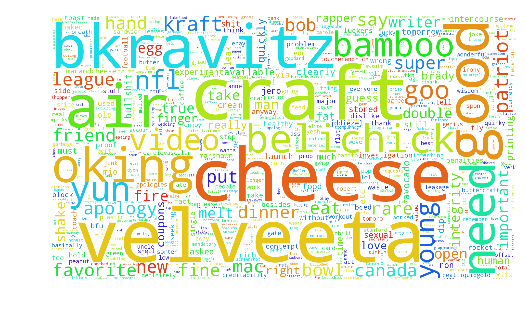

In [262]:
data_pos = data[data.sentiment=='positive']

text = '-'.join(data_pos.text.values.tolist())

wordcloud = WordCloud().generate(text)

import matplotlib.pyplot as plt


wordcloud = WordCloud(width=1900, height=1080, background_color="white", max_font_size=300, max_words=1000).generate(text)
wordcloud.to_file("pos_cloud.png")

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Top Frequency words in positive sentiments are 
* craft
* cheese
* velveeta
* air
* good

We have to analyse each tweet containing these keywords to validate the sentiment

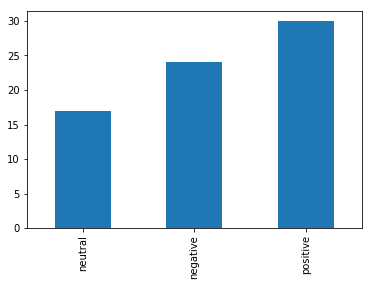

In [23]:
%matplotlib inline 
data[(data.text.str.contains('cheese')) | (data.text.str.contains('velveeta'))].sentiment.value_counts().sort_values().plot(kind='bar')

###  Way Ahead
* In realtime project we would have converted the text of DTM and Word Cloud into Japaneese to provide business solution in thier native language.

* Instead of relying on TextBlod for categorizing positive and negative sentiment we would be using custom algorithm which can be tuned to business need.

* Instead of static flat file we would have proposed real time solution to business where a batch to 10 second tweets will be processed to provide real time sentiment tracking. This will be useful in sccenarious where business want to track the impact of buzz in social media

...Continued